In [16]:
import requests
import pandas as pd
from io import StringIO

# 기본 설정
API_URL = "https://apihub.kma.go.kr/api/typ01/url/sfc_obs_nc_sts_area_api.php"
AUTH_KEY = "lQV-ujhcQHGFfro4XGBxng"
ADMCODE = "47230000"

params_base = {
    "tm1": 2023,
    "tm2": 2023,
    "admcode": ADMCODE,
    "disp": 0,
    "reduce": 0,
    "authKey": AUTH_KEY
}

variables = {
    "ta_avg": "평균기온",
    "td_avg": "평균이슬점온도",
    "hm_avg": "평균상대습도"
}

data_frames = {}

for var_code, var_name in variables.items():
    print(f"📥 {var_name} ({var_code}) 조회 중...")

    params = params_base.copy()
    params["var"] = var_code

    response = requests.get(API_URL, params=params)
    response.raise_for_status()

    # CSV 문자열을 판다스로 바로 읽기
    df = pd.read_csv(StringIO(response.text))

    # 연도 컬럼명을 변수명으로 바꾸기
    df.rename(columns={"2023": var_code, "latitude": "lat", "longitude": "lon"}, inplace=True)

    data_frames[var_code] = df

# 병합
df_merged = data_frames["ta_avg"]
for var in ["td_avg", "hm_avg"]:
    df_merged = df_merged.merge(
        data_frames[var][["lat", "lon", var]],
        on=["lat", "lon"],
        how="left"
    )

print("✅ 최종 병합 데이터:")
print(df_merged.head())

# CSV 저장(Optional)
# df_merged.to_csv("영천시_WBGT_입력기초.csv", index=False)


📥 평균기온 (ta_avg) 조회 중...
📥 평균이슬점온도 (td_avg) 조회 중...
📥 평균상대습도 (hm_avg) 조회 중...
✅ 최종 병합 데이터:
         lat         lon  ta_avg  td_avg  hm_avg
0  36.011266  128.697291     9.9     4.3    71.0
1  36.015867  128.697481     9.1     3.8    73.0
2  36.020467  128.697672     8.9     3.6    73.0
3  36.025068  128.697863     9.0     3.7    73.0
4  36.029669  128.698054     9.3     3.9    73.0


<>:21: SyntaxWarning: invalid escape sequence '\S'
<>:21: SyntaxWarning: invalid escape sequence '\S'
C:\Users\dodam\AppData\Local\Temp\ipykernel_41424\2831521134.py:21: SyntaxWarning: invalid escape sequence '\S'
  yeongcheon = gpd.read_file("data\SHP\경상북도\LARD_ADM_SECT_SGG_47_202505.shp").to_crs("EPSG:4326")


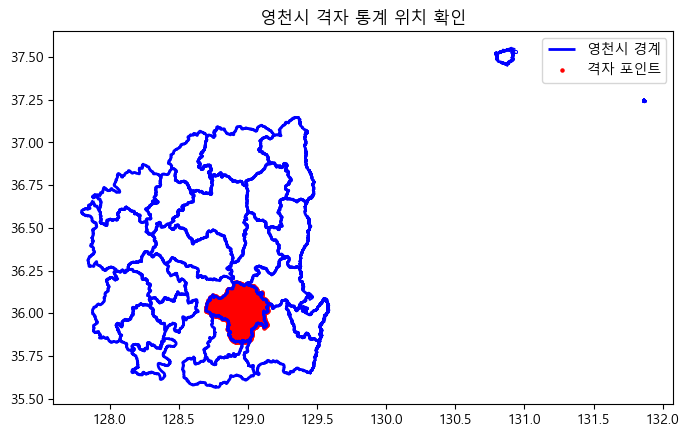

In [19]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import platform

# 폰트 설정
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
elif platform.system() == 'Darwin':
    plt.rcParams['font.family'] = 'AppleGothic'
else:
    plt.rcParams['font.family'] = 'NanumGothic'

plt.rcParams['axes.unicode_minus'] = False

# GeoDataFrame 변환
geometry = [Point(xy) for xy in zip(df_merged["lon"], df_merged["lat"])]
gdf = gpd.GeoDataFrame(df_merged, geometry=geometry, crs="EPSG:4326")

# 영천시 Shapefile 불러오기
yeongcheon = gpd.read_file("data\SHP\경상북도\LARD_ADM_SECT_SGG_47_202505.shp").to_crs("EPSG:4326")

# 시각화
fig, ax = plt.subplots(figsize=(8, 8))
yeongcheon.boundary.plot(ax=ax, edgecolor="blue", linewidth=2, label="영천시 경계")
gdf.plot(ax=ax, color="red", markersize=5, label="격자 포인트")
plt.title("영천시 격자 통계 위치 확인")
plt.legend()
plt.show()

⏬ 202307210000 데이터 다운로드 중...
✅ 저장 완료: data/SWRAD/raw\SWRAD_202307210000.nc
⏬ 202307210100 데이터 다운로드 중...
✅ 저장 완료: data/SWRAD/raw\SWRAD_202307210100.nc
⏬ 202307210200 데이터 다운로드 중...
✅ 저장 완료: data/SWRAD/raw\SWRAD_202307210200.nc
⏬ 202307210300 데이터 다운로드 중...
✅ 저장 완료: data/SWRAD/raw\SWRAD_202307210300.nc
⏬ 202307210400 데이터 다운로드 중...
✅ 저장 완료: data/SWRAD/raw\SWRAD_202307210400.nc
⏬ 202307210500 데이터 다운로드 중...
✅ 저장 완료: data/SWRAD/raw\SWRAD_202307210500.nc
⏬ 202307210600 데이터 다운로드 중...
✅ 저장 완료: data/SWRAD/raw\SWRAD_202307210600.nc
⏬ 202307210700 데이터 다운로드 중...
✅ 저장 완료: data/SWRAD/raw\SWRAD_202307210700.nc
⏬ 202307210800 데이터 다운로드 중...
✅ 저장 완료: data/SWRAD/raw\SWRAD_202307210800.nc
⏬ 202307210900 데이터 다운로드 중...
✅ 저장 완료: data/SWRAD/raw\SWRAD_202307210900.nc
⏬ 202307211000 데이터 다운로드 중...
✅ 저장 완료: data/SWRAD/raw\SWRAD_202307211000.nc
⏬ 202307211100 데이터 다운로드 중...
✅ 저장 완료: data/SWRAD/raw\SWRAD_202307211100.nc
⏬ 202307211200 데이터 다운로드 중...
✅ 저장 완료: data/SWRAD/raw\SWRAD_202307211200.nc
⏬ 202307211300 데이터 다운로드 중

FileNotFoundError: [Errno 2] No such file or directory: 'data/SWRAD/plots/swrad_time_series.png'

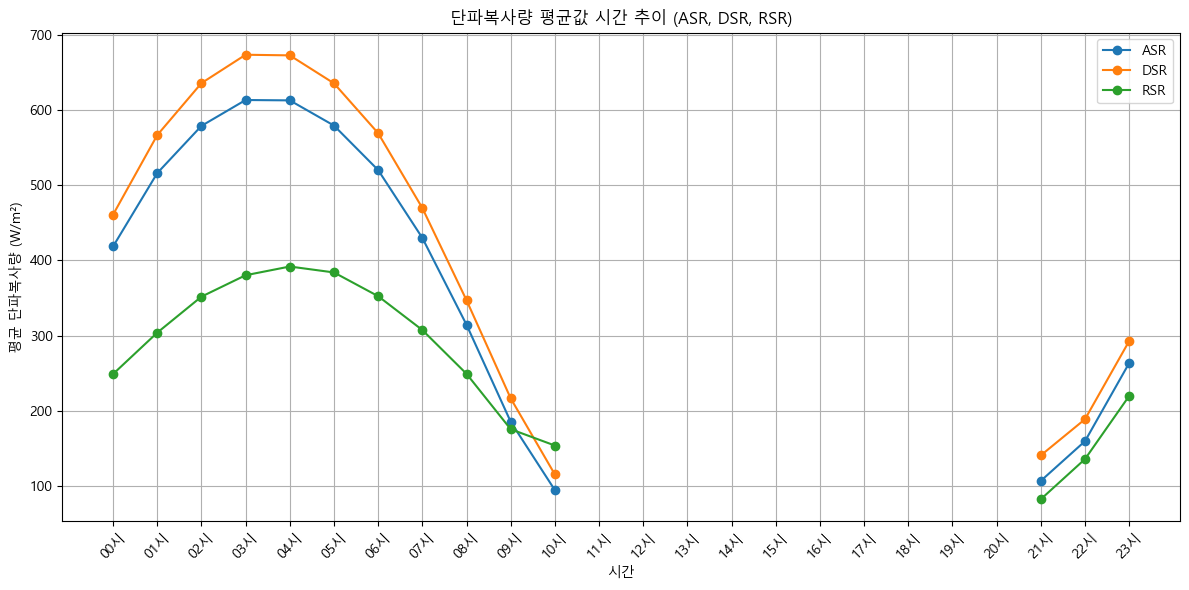

In [12]:
import requests
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib as mpl
from datetime import datetime, timedelta
import os

# 설정
mpl.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False

auth_key = "lQV-ujhcQHGFfro4XGBxng"
data_type = "SWRAD"
area = "KO"
base_date = datetime.strptime("202307210000", "%Y%m%d%H%M")

# 디렉토리 설정
save_dir = "data/SWRAD/raw"
os.makedirs(save_dir, exist_ok=True)

# 변수별 시간 시계열 저장용
time_labels = []
avg_values = {
    "ASR": [],
    "DSR": [],
    "RSR": []
}

# 24시간 반복
for hour_offset in range(24):
    time_point = base_date + timedelta(hours=hour_offset)
    date_str = time_point.strftime("%Y%m%d%H%M")
    time_label = time_point.strftime("%H시")
    time_labels.append(time_label)

    url = f"https://apihub.kma.go.kr/api/typ05/api/GK2A/LE2/{data_type}/{area}/data"
    params = {
        "date": date_str,
        "authKey": auth_key
    }

    out_file_path = os.path.join(save_dir, f"{data_type}_{date_str}.nc")

    if not os.path.exists(out_file_path):
        print(f"⏬ {date_str} 데이터 다운로드 중...")
        response = requests.get(url, params=params)
        if response.status_code != 200:
            print(f"❌ 다운로드 실패: {response.status_code}, {response.text}")
            for var in avg_values:
                avg_values[var].append(None)
            continue
        with open(out_file_path, "wb") as f:
            f.write(response.content)
        print(f"✅ 저장 완료: {out_file_path}")
    else:
        print(f"📁 이미 존재: {out_file_path}")

    # 평균값 추출
    try:
        ds = xr.open_dataset(out_file_path)
        for var in ["ASR", "DSR", "RSR"]:
            if var in ds:
                avg_val = ds[var].mean().item()
                avg_values[var].append(avg_val)
            else:
                avg_values[var].append(None)
    except Exception as e:
        print(f"❌ NetCDF 처리 오류: {e}")
        for var in avg_values:
            avg_values[var].append(None)

# 시각화
plt.figure(figsize=(12, 6))
for var in ["ASR", "DSR", "RSR"]:
    plt.plot(time_labels, avg_values[var], marker='o', label=var)

plt.title("단파복사량 평균값 시간 추이 (ASR, DSR, RSR)")
plt.xlabel("시간")
plt.ylabel("평균 단파복사량 (W/m²)")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("data/SWRAD/plots/swrad_time_series.png")
plt.show()


⏬ 202301010000 데이터 다운로드 중...
✅ 저장 완료: data/SWRAD/yearly_raw\SWRAD_202301010000.nc
⏬ 202301080000 데이터 다운로드 중...
✅ 저장 완료: data/SWRAD/yearly_raw\SWRAD_202301080000.nc
⏬ 202301150000 데이터 다운로드 중...
✅ 저장 완료: data/SWRAD/yearly_raw\SWRAD_202301150000.nc
⏬ 202301220000 데이터 다운로드 중...
✅ 저장 완료: data/SWRAD/yearly_raw\SWRAD_202301220000.nc
⏬ 202301290000 데이터 다운로드 중...
✅ 저장 완료: data/SWRAD/yearly_raw\SWRAD_202301290000.nc
⏬ 202302050000 데이터 다운로드 중...
✅ 저장 완료: data/SWRAD/yearly_raw\SWRAD_202302050000.nc
⏬ 202302120000 데이터 다운로드 중...
✅ 저장 완료: data/SWRAD/yearly_raw\SWRAD_202302120000.nc
⏬ 202302190000 데이터 다운로드 중...
✅ 저장 완료: data/SWRAD/yearly_raw\SWRAD_202302190000.nc
⏬ 202302260000 데이터 다운로드 중...
✅ 저장 완료: data/SWRAD/yearly_raw\SWRAD_202302260000.nc
⏬ 202303050000 데이터 다운로드 중...
✅ 저장 완료: data/SWRAD/yearly_raw\SWRAD_202303050000.nc
⏬ 202303120000 데이터 다운로드 중...
✅ 저장 완료: data/SWRAD/yearly_raw\SWRAD_202303120000.nc
⏬ 202303190000 데이터 다운로드 중...
✅ 저장 완료: data/SWRAD/yearly_raw\SWRAD_202303190000.nc
⏬ 202303260000 데

FileNotFoundError: [Errno 2] No such file or directory: 'data/SWRAD/yearly_plot/swrad_yearly_trend.png'

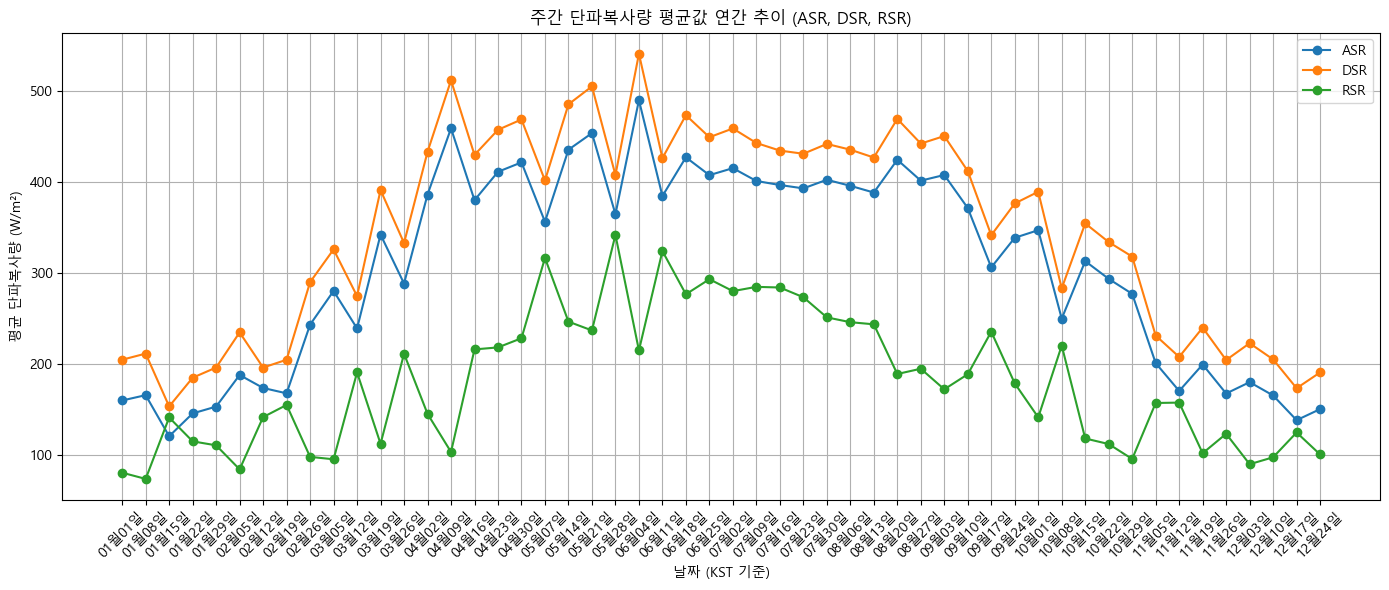

In [13]:
import requests
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib as mpl
from datetime import datetime, timedelta
import os

# 설정
mpl.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False

auth_key = "lQV-ujhcQHGFfro4XGBxng"
data_type = "SWRAD"
area = "KO"
start_date = datetime.strptime("2023-01-01 00:00", "%Y-%m-%d %H:%M")
weeks = 52  # 1년치 데이터 (주 1회 수집)

# 디렉토리 설정
save_dir = "data/SWRAD/yearly_raw"
os.makedirs(save_dir, exist_ok=True)

# 결과 저장용
date_labels = []
avg_values = {
    "ASR": [],
    "DSR": [],
    "RSR": []
}

# 주 1회 간격으로 반복
for week in range(weeks):
    time_point = start_date + timedelta(days=7 * week)
    date_utc = time_point.strftime("%Y%m%d%H%M")  # UTC 기준 00시
    date_kst_label = (time_point + timedelta(hours=9)).strftime("%m월%d일")

    date_labels.append(date_kst_label)

    url = f"https://apihub.kma.go.kr/api/typ05/api/GK2A/LE2/{data_type}/{area}/data"
    params = {
        "date": date_utc,
        "authKey": auth_key
    }

    out_file_path = os.path.join(save_dir, f"{data_type}_{date_utc}.nc")

    if not os.path.exists(out_file_path):
        print(f"⏬ {date_utc} 데이터 다운로드 중...")
        response = requests.get(url, params=params)
        if response.status_code != 200:
            print(f"❌ 다운로드 실패: {response.status_code}, {response.text}")
            for var in avg_values:
                avg_values[var].append(None)
            continue
        with open(out_file_path, "wb") as f:
            f.write(response.content)
        print(f"✅ 저장 완료: {out_file_path}")
    else:
        print(f"📁 이미 존재: {out_file_path}")

    # NetCDF 열고 평균값 추출
    try:
        ds = xr.open_dataset(out_file_path)
        for var in ["ASR", "DSR", "RSR"]:
            if var in ds:
                avg_val = ds[var].mean().item()
                avg_values[var].append(avg_val)
            else:
                avg_values[var].append(None)
    except Exception as e:
        print(f"❌ NetCDF 처리 오류: {e}")
        for var in avg_values:
            avg_values[var].append(None)

# 시각화
plt.figure(figsize=(14, 6))
for var in ["ASR", "DSR", "RSR"]:
    plt.plot(date_labels, avg_values[var], marker='o', label=var)

plt.title("주간 단파복사량 평균값 연간 추이 (ASR, DSR, RSR)")
plt.xlabel("날짜 (KST 기준)")
plt.ylabel("평균 단파복사량 (W/m²)")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("data/SWRAD/yearly_plot/swrad_yearly_trend.png")
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'data/SWRAD/yearly_plot/swrad_3panel_map_with_yeongcheon.png'

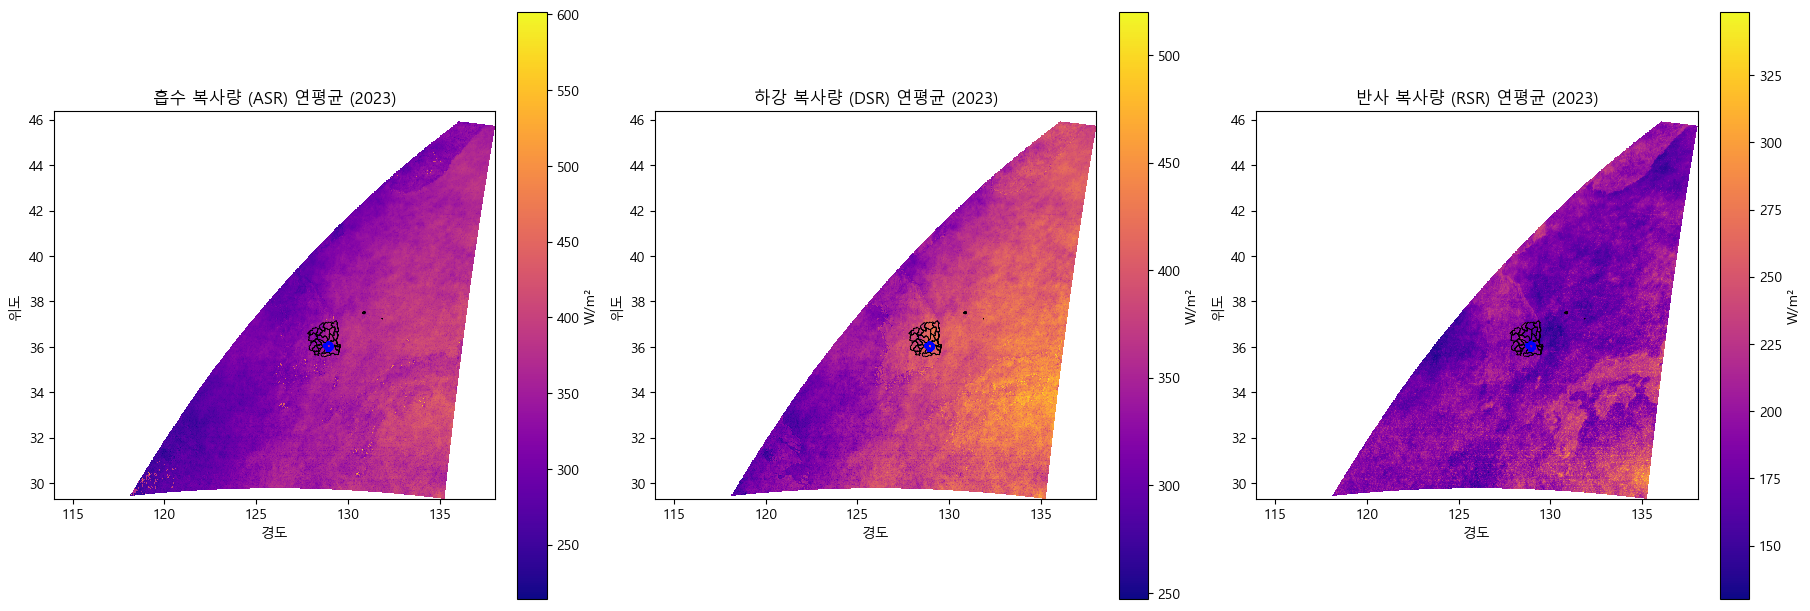

In [34]:
import os
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import geopandas as gpd

# 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 경로 설정
nc_dir = "data/SWRAD/yearly_raw"
latlon_ds = xr.open_dataset("gk2a_ko020lc_latlon.nc")
lat = latlon_ds["lat"]
lon = latlon_ds["lon"]

# 누적 합 초기화
sum_values = {var: None for var in ["ASR", "DSR", "RSR"]}
count = 0

# 모든 .nc 파일에 대해 연산
for fname in sorted(os.listdir(nc_dir)):
    if not fname.endswith(".nc"):
        continue
    ds = xr.open_dataset(os.path.join(nc_dir, fname))
    for var in sum_values:
        if var in ds:
            data = ds[var]
            if sum_values[var] is None:
                sum_values[var] = data.copy()
            else:
                sum_values[var] += data
    count += 1

# 평균 계산
mean_values = {
    var: (sum_values[var] / count) if sum_values[var] is not None else None
    for var in sum_values
}

# 경계도 로드
gdf_shp = gpd.read_file("data/SHP/경상북도/LARD_ADM_SECT_SGG_47_202505.shp").to_crs("EPSG:4326")
gdf_yeongcheon = gdf_shp[gdf_shp["SGG_NM"].str.contains("영천시")]

# 시각화
fig, axes = plt.subplots(1, 3, figsize=(18, 6), constrained_layout=True)
cmap = "plasma"
titles = {"ASR": "흡수 복사량 (ASR)", "DSR": "하강 복사량 (DSR)", "RSR": "반사 복사량 (RSR)"}

for i, var in enumerate(["ASR", "DSR", "RSR"]):
    ax = axes[i]
    pcm = ax.pcolormesh(lon, lat, mean_values[var], shading="auto", cmap=cmap)
    gdf_shp.boundary.plot(ax=ax, edgecolor="black", linewidth=0.5)
    gdf_yeongcheon.boundary.plot(ax=ax, edgecolor="blue", linewidth=2, label="영천시 경계")
    ax.set_title(f"{titles[var]} 연평균 (2023)", fontsize=12)
    ax.set_xlabel("경도")
    ax.set_ylabel("위도")
    plt.colorbar(pcm, ax=ax, orientation="vertical", label="W/m²")

plt.savefig("data/SWRAD/yearly_plot/swrad_3panel_map_with_yeongcheon.png")
plt.show()

In [35]:
import os
import numpy as np
import xarray as xr

# 설정
nc_dir = "data/SWRAD/yearly_raw"
save_path = "data/SWRAD/yearly_plot/mean_swrad.npz"
os.makedirs(os.path.dirname(save_path), exist_ok=True)

# 누적 합 저장용
sum_values = {var: None for var in ["ASR", "DSR", "RSR"]}
count = 0

# .nc 파일 반복 처리
for fname in sorted(os.listdir(nc_dir)):
    if not fname.endswith(".nc"):
        continue
    ds = xr.open_dataset(os.path.join(nc_dir, fname))
    for var in sum_values:
        if var in ds:
            data = ds[var]
            if sum_values[var] is None:
                sum_values[var] = data.copy()
            else:
                sum_values[var] += data
    count += 1

# 평균 계산
mean_values = {
    var: (sum_values[var] / count).values if sum_values[var] is not None else None
    for var in sum_values
}

# 저장
np.savez(save_path, **mean_values)
print(f"✅ 저장 완료: {save_path}")

✅ 저장 완료: data/SWRAD/yearly_plot/mean_swrad.npz


In [38]:
import pandas as pd
import numpy as np
import xarray as xr
from scipy.spatial import cKDTree

# 1. 입력 데이터
df = pd.read_csv("data/영천시_WBGT_입력기초.csv")

# 2. SWRAD 연평균 NetCDF 로드
ds_latlon = xr.open_dataset("gk2a_ko020lc_latlon.nc")
lat = ds_latlon["lat"].values
lon = ds_latlon["lon"].values

swrad = np.load("data/SWRAD/yearly_plot/mean_swrad.npz")
ASR = swrad["ASR"]
DSR = swrad["DSR"]
RSR = swrad["RSR"]

# 3. KDTree를 이용해 가장 가까운 격자 추출
latlon_grid = np.column_stack([lat.ravel(), lon.ravel()])
tree = cKDTree(latlon_grid)

query_points = df[["lat", "lon"]].values
_, indexes = tree.query(query_points)
i, j = np.unravel_index(indexes, lat.shape)

df["ASR"] = ASR[i, j]
df["DSR"] = DSR[i, j]
df["RSR"] = RSR[i, j]

# 4. Tnwb 계산 (Stull 2011)
Ta = df["ta_avg"]
RH = df["hm_avg"]

Tnwb = (
    Ta * np.arctan(0.151977 * np.sqrt(RH + 8.313659))
    + np.arctan(Ta + RH)
    - np.arctan(RH - 1.676331)
    + 0.00391838 * RH ** 1.5 * np.arctan(0.023101 * RH)
    - 4.686035
)
df["Tnwb"] = Tnwb

# 5. Tg 근사 (복사량 기반)
df["Tg"] = df["ta_avg"] + 0.02 * np.sqrt(df["DSR"])

# 6. WBGT 계산 (실외 기준)
df["WBGT"] = 0.7 * df["Tnwb"] + 0.2 * df["Tg"] + 0.1 * df["ta_avg"]

# 7. 저장
df.to_csv("data/영천시_WBGT_계산결과.csv", index=False)

C:\Users\dodam\AppData\Local\Temp\ipykernel_1536\3542984704.py:21: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  yeongcheon = gdf[gdf["SGG_NM"].str.contains("영천시")].geometry.unary_union


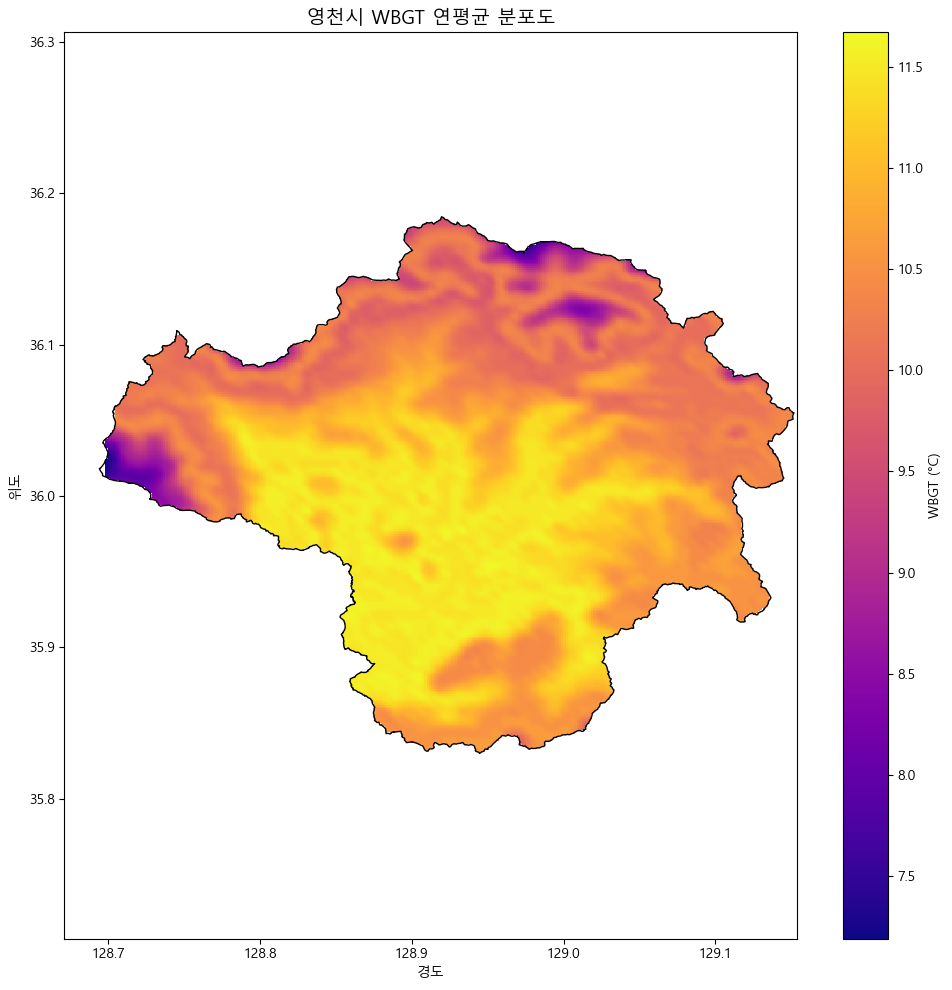

In [44]:
from shapely.geometry import Point
from shapely.geometry import Polygon
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.interpolate import griddata

# 1. 입력
df = pd.read_csv("data/영천시_WBGT_계산결과.csv")
lon, lat, wbgt = df["lon"], df["lat"], df["WBGT"]

# 2. 그리드 생성
grid_lon = np.linspace(lon.min(), lon.max(), 300)
grid_lat = np.linspace(lat.min(), lat.max(), 300)
grid_x, grid_y = np.meshgrid(grid_lon, grid_lat)
grid_z = griddata((lon, lat), wbgt, (grid_x, grid_y), method="cubic")

# 3. 영천시 경계 불러오기
gdf = gpd.read_file("data/SHP/경상북도/LARD_ADM_SECT_SGG_47_202505.shp").to_crs("EPSG:4326")
yeongcheon = gdf[gdf["SGG_NM"].str.contains("영천시")].geometry.unary_union

# 4. 마스크 생성: 경계 내부만 True
mask = np.array([
    [yeongcheon.contains(Point(x, y)) for x in grid_lon]
    for y in grid_lat
])

# 5. 마스킹된 값으로 처리
masked_z = np.where(mask, grid_z, np.nan)

# 6. 시각화
fig, ax = plt.subplots(figsize=(10, 10))
pcm = ax.pcolormesh(grid_x, grid_y, masked_z, cmap="plasma", shading="auto")

gpd.GeoSeries(yeongcheon).boundary.plot(ax=ax, edgecolor="black", linewidth=1)

plt.colorbar(pcm, ax=ax, label="WBGT (°C)")
ax.set_title("영천시 WBGT 연평균 분포도", fontsize=14)
ax.set_xlabel("경도")
ax.set_ylabel("위도")
plt.axis("equal")
plt.tight_layout()
plt.savefig("data/영천시_WBGT.png")
plt.show()